In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('employee_data.csv')

print("Data from CSV:")
print(df.head())

Data from CSV:
  Department  Status   Usia   Gaji  Jumlah
0      Sales  Senior  31-35  46-50      30
1      Sales  Junior  26-30  26-30      40
2      Sales  Junior  31-35  31-35      40
3    Systems  Junior  21-25  46-50      20
4    Systems  Senior  31-35  66-70       5


In [23]:
# Encode categorical data using LabelEncoder
encoders = {}
df_encoded = df.copy()

for col in ['Department', 'Status', 'Usia', 'Gaji']:
    encoders[col] = LabelEncoder()
    df_encoded[col] = encoders[col].fit_transform(df[col])

# Step 3: Split the data into features (X) and target (y)
X = df_encoded[['Department', 'Usia', 'Gaji']]
y = df_encoded['Status']


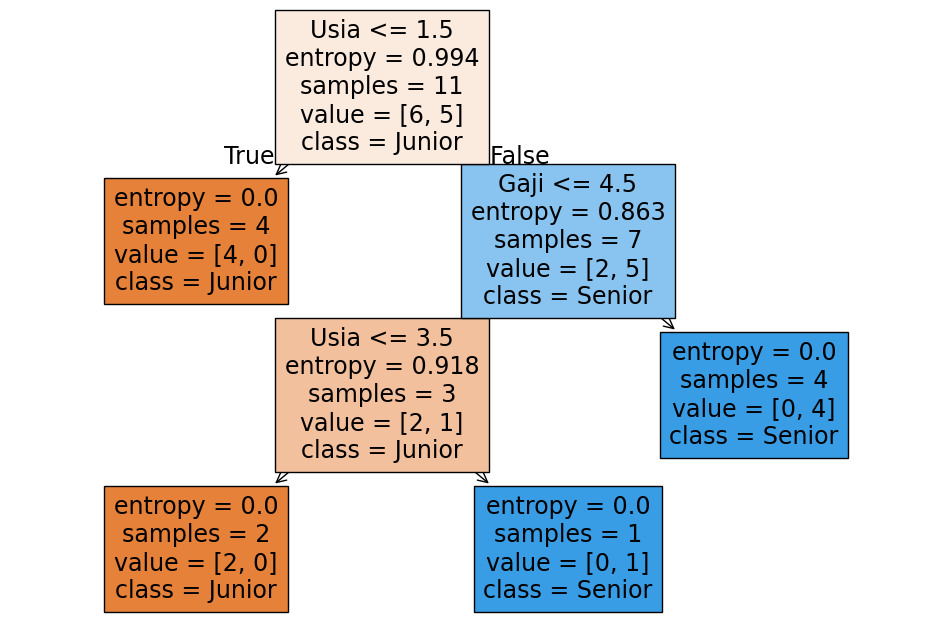

In [24]:
# Build and visualize the Decision Tree
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['Department', 'Usia', 'Gaji'], 
          class_names=encoders['Status'].classes_, filled=True)
plt.show()

In [25]:
# Use Naive Bayes to classify new data
new_data = {'Department': 'Systems', 'Usia': '26-30', 'Gaji': '46-50'}

# Encode the new data using the same encoders
X_new = pd.DataFrame({
    col: [encoders[col].transform([new_data[col]])[0]] 
    for col in ['Department', 'Usia', 'Gaji']
})

# Build and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

# Predict the status for the new data
y_pred = nb_model.predict(X_new)
predicted_status = encoders['Status'].inverse_transform(y_pred)[0]

print(f"Predicted Status for the new data X: {predicted_status}")




Predicted Status for the new data X: Junior
